<a href="https://colab.research.google.com/github/ndhend/Winc_assignments/blob/main/Final_CO2_emissions_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primary energy consumption per unit of gross domestic product, measured in kilowatt-hours per international-$


In [99]:
#import code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

# Filter data for the year 2018
data_2018 = data[data['year'] == 2018]

# Drop rows with missing values
data_2018_cleaned = data_2018.dropna()
# display(data_2018_cleaned['energy_per_capita'])

#Biggest Predictor
Question: What is the biggest predictor of a large CO2 output per capita of a country?

# Looking at correlations
Although the correlations are too close to zero to even say something, co2_per_gdp is the furthest away from zero. So it might be possible that the gdp of a country is the biggest predictor of large co2 output, but that's difficult to say and more research needs to be done.

In [100]:
import pandas as pd

# Load your dataset
data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

# Filter data for the year 2018 as data after 2018 has so many missing values that you cannot work with the dataset.
data_2018 = data[data['year'] == 2018]
# display(data_2018)
# Drop rows with missing values
data_2018_cleaned = data_2018.dropna().reset_index(drop=True)
# display(data_2018_cleaned)

# Perform correlation analysis
correlation_matrix = data_2018_cleaned.corr() # correlation on the full data set

# Select variables with highest correlation to CO2 output per capita
target_variable = 'co2_per_capita'  # Adjust the column name as needed
correlation_with_target = correlation_matrix[target_variable]
significant_predictors = correlation_with_target[abs(correlation_with_target) > 0.5].index.tolist()

# Prepare data for regression analysis
X = data_2018_cleaned[significant_predictors]
y = data_2018_cleaned[target_variable]

# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Print coefficient values and interpret the results
coefficients = pd.DataFrame({'Variable': significant_predictors, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
# print(coefficients)


<ipython-input-100-26da455f62d3>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_2018_cleaned.corr() # correlation on the full data set


# gdp vs co2


In [115]:
# display(data_2018_cleaned )
highest_co2_countries = data_2018_cleaned.sort_values(by=['co2_per_capita'], ascending=False).head(10).reset_index(drop=True)
# display(highest_co2_countries)
highest_co2_countries['gdp_per_capita'] = highest_co2_countries['gdp']/highest_co2_countries['population']
# display(highest_co2_countries.columns)

selected_countries = highest_co2_countries[['co2_per_capita', 'consumption_co2_per_capita', 'gdp_per_capita']]

# Perform correlation analysis
correlation_matrix = selected_countries.corr() # correlation on the full data set

# Select variables with highest correlation to CO2 output per capita
target_variable = 'co2_per_capita'
correlation_with_target = correlation_matrix[target_variable]
significant_predictors = correlation_with_target[abs(correlation_with_target) > 0.1].index.tolist()

# Prepare data for regression analysis
X = selected_countries[significant_predictors]
y = selected_countries[target_variable]

# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Print coefficient values and interpret the results
coefficients = pd.DataFrame({'Variable': significant_predictors, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients) # negative correlation between gdp_per_capita and co2_per_capita??!!



                     Variable   Coefficient
0              co2_per_capita  1.000000e+00
2              gdp_per_capita -3.308212e-18
1  consumption_co2_per_capita -2.209995e-16


Output correlations ten countries with highest co2_per_capita:
  Variable   Coefficient
0              co2_per_capita  1.000000e+00
2              gdp_per_capita -3.308212e-18
1  consumption_co2_per_capita -2.209995e-16

However, this output is backed up by this article:
https://www.ecosystemmarketplace.com/articles/21-countries-reducing-carbon-emissions-growing-gdp

The International Energy Agency recently reported that energy-related emissions have “decoupled” from economic growth over the last two years, and it turns out that nearly two dozen countries have done the same, according to Nate Aden of the World Resources Institute. The countries ranged from Austria to Uzbekistan and include Germany, the United States and the United Kingdom.

Based on this conclusion, I will continue looking at the several sources of energy

#Pair plot

<ipython-input-101-56ec7f7b491b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_source_data['energy_per_capita_tonnes'] = co2_source_data['energy_per_capita'] * conversion_factor
<ipython-input-101-56ec7f7b491b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_source_data['gdp_per_capita'] = co2_source_data['gdp']/co2_source_data['population']
<ipython-input-101-56ec7f7b491b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

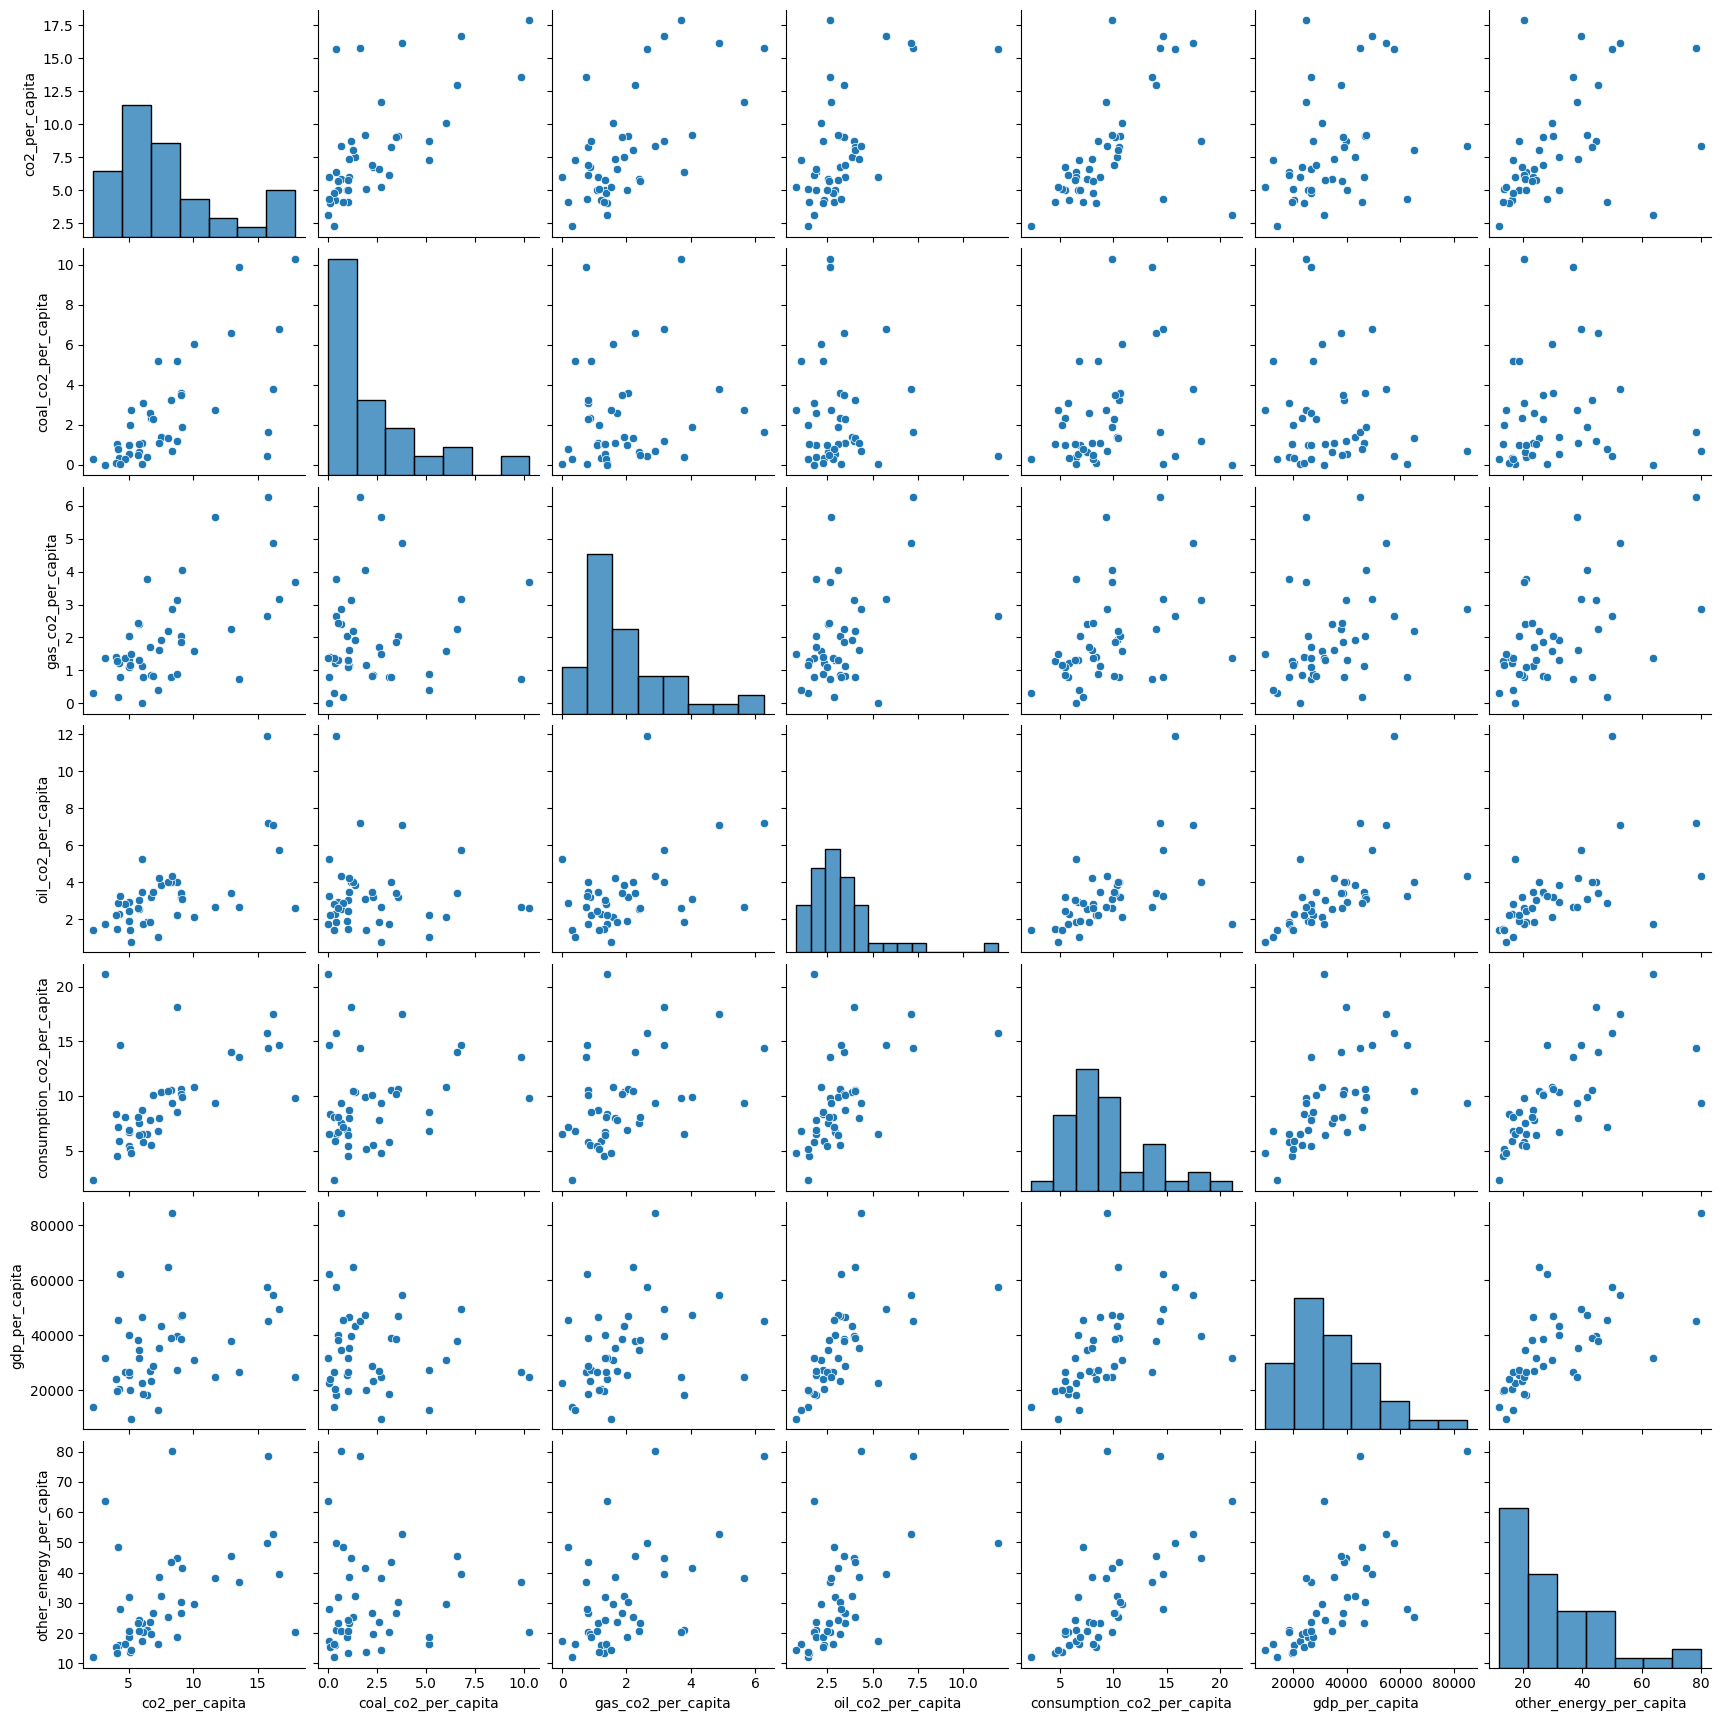

In [101]:
# display(data_2018_cleaned) # looking at all the countries without nan

# creating a new dataframe with energy sources but also consumption,
# as I want to see if consumptions also has a great impact
# and looking again at the correlations using a pair plot.

co2_source_data = data_2018_cleaned[['country', 'co2_per_capita',
                                 'population',
                                 'gdp','coal_co2_per_capita',
                                 'energy_per_capita',
                                 'gas_co2_per_capita',
                                 'oil_co2_per_capita',
                                 'consumption_co2_per_capita'
                                 ]]

# display(co2_source_data)


# How do you convert kWh to CO2?
# Electricity : Input value (in KWh/Yr) X 0.85 (Emission Factor) = Output value in (Kg of CO2)
# Conversion Factor = 0.85 kg CO2/kWh / 1000 = 0.00085 metric tons CO2/kWh

# Conversing kWh to tonnes per person
conversion_factor = 0.00085

# Create a new column for converted values
co2_source_data['energy_per_capita_tonnes'] = co2_source_data['energy_per_capita'] * conversion_factor
# display(co2_source_data)

# display(co2_source_data['energy_per_capita_tonnes'])
# sorted_co2_source_data = co2_source_data.sort_values(by='co2_per_capita', ascending=False).reset_index(drop=True).head(10)
# display(sorted_co2_source_data)

# create new column gdp_per_capita
co2_source_data['gdp_per_capita'] = co2_source_data['gdp']/co2_source_data['population']

# create new column 'other_energy_per_capita'# Replace 'coal_co2_per_capita', 'oil_co2_per_capita', etc. with the actual column names for each energy type
specified_energies = co2_source_data[['coal_co2_per_capita', 'oil_co2_per_capita', 'gas_co2_per_capita' ]]

# Sum the specified energy columns along the rows
total_specified_energy = specified_energies.sum(axis=1)

# Subtract the total specified energy from energy_per_capita to get other_energy_per_capita
co2_source_data['other_energy_per_capita'] = co2_source_data['energy_per_capita_tonnes'] - total_specified_energy

# drop colums gdp, population, energy_per_capita
co2_source_data.drop(columns=['gdp', 'population', 'energy_per_capita', 'energy_per_capita_tonnes'], inplace=True)
# display(co2_source_data.head(1))


# creating a pair plot
# Load your data into a DataFrame
variables_to_plot = ['country', 'co2_per_capita', 'coal_co2_per_capita',
       'gas_co2_per_capita', 'oil_co2_per_capita',
       'consumption_co2_per_capita', 'gdp_per_capita',
       'other_energy_per_capita']

# Create a pair plot
sns.pairplot(co2_source_data[variables_to_plot])
plt.show()



# Heatmap

<ipython-input-92-dd88d0161441>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  energy_correlation_matrix = co2_source_data.corr()


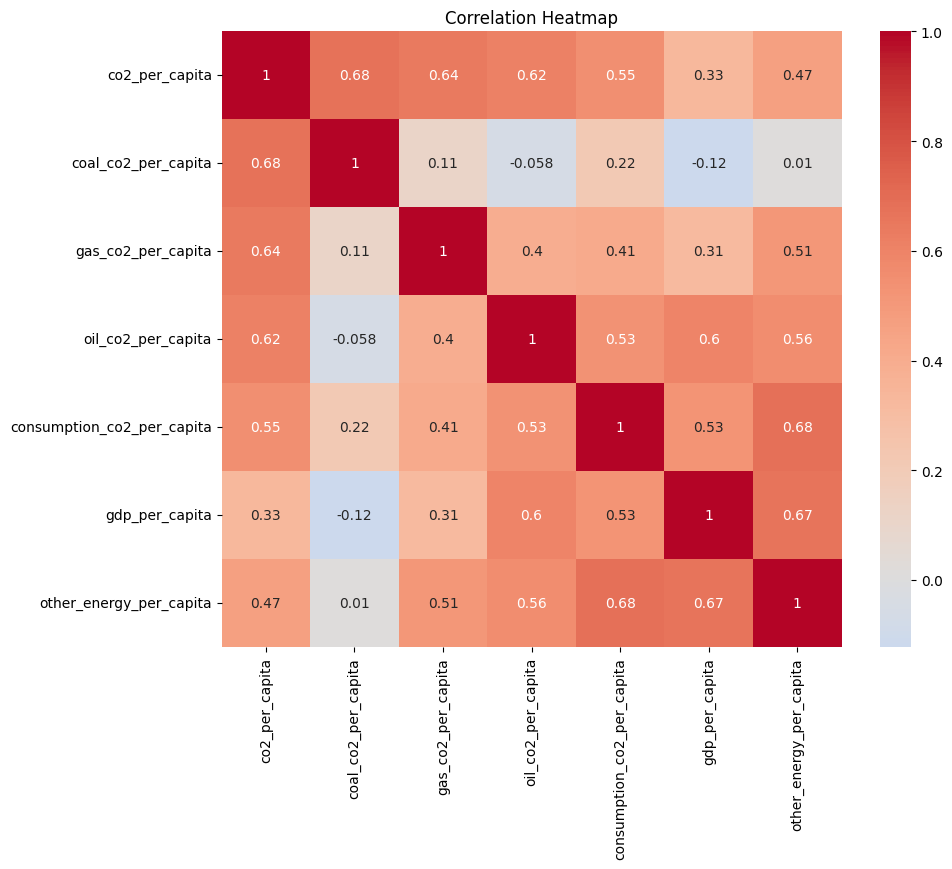

In [ ]:
# creating a heat map
energy_correlation_matrix = co2_source_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(energy_correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


# Analysis of pair plot and heat map
Pairplot:
The variables co2, gdp, oil and other_energy are the most common (4,5,4,5) in a positive correlation with the other variables followed by the other variables
coal, gas and consumption (1,1,2)
gdp has the strongest correlation with other energy,
other_energy has the strong correlation with co2, gdp, consumption and oil.
Other_energy is defined as primary energy, but not further specified. According to this pair plot, using other_energy does not lower co2 per capita. However, in the heat map it has the lowest correlation compared to the other sources of energy.

Heat map:
Although the negative correlation between gdp and coal is very weak, it may still show something. Namely that countries with a high gdp may have found other solutions for energy from coal and that could mean something, because co2 has the strongest positive correlation with coal. Also, it could be said that the use of energy always creates co2 emissions, but that it creates less emissions if not using, gas, oil of coal and the most when using coal.

Based on the conclusions from https://www.ecosystemmarketplace.com/articles/21-countries-reducing-carbon-emissions-growing-gdp/ and my own analysis, the use of coal as an energy source could be the biggest predictor of a large CO2 output per capita of a country and probably the countries with a high gdp are the countries who are able to use other sources of energy that emits less co2 than countries with lower gdp.